* About Data set 

This dataset has been taken from the data catalog of data.gov and it showcases the number and other technical information about the electric vehicles that are currently on the roads of The United States of America.

* columns 
    VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
    'Make', 'Model', 'Electric Vehicle Type',
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
    'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
    'Vehicle Location', 'Electric Utility', '2020 Census Tract


In [16]:
import pandas as pd 
import numpy as np 
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(
    style="darkgrid",  # Options: "whitegrid", "darkgrid", "white", "dark", "ticks"
    palette="viridis", # Default color palette for all plots
    rc={
        "axes.titlesize": 18,       # Title font size
        "axes.labelsize": 14,       # Axis label font size
        "xtick.labelsize": 12,      # X-tick label font size
        "ytick.labelsize": 12,      # Y-tick label font size
        "axes.facecolor": "#2e2e2e", # Background color for axes
        "figure.facecolor": "#1e1e1e", # Background color for the figure
        "axes.edgecolor": "white",  # Axis edge color
        "text.color": "white",      # Text color
    }
)

plt.rcParams["figure.figsize"] = (10, 6)  # Default figure size
plt.rcParams["axes.grid"] = True         # Enable grid by default
plt.rcParams["grid.color"] = "#444444"  # Grid line color
plt.rcParams["grid.linestyle"] = "--" 

%matplotlib inline 




In [17]:
Ev_Data = pd.read_csv('Data/Electric_Vehicle_Population_Data.csv')
Ev_Data.head(5)


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [18]:
Ev_Data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [19]:
Ev_Data.isna().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

# handling missing Value 

In [20]:
impute_country = pd.pivot_table(data=Ev_Data,index="County",values="Legislative District").reset_index()
impute_county_dic = dict(zip(impute_country['County'], impute_country['Legislative District']))


impute_city = pd.pivot_table(data=Ev_Data,index='City',values='Legislative District').reset_index()
impute_city_dic = dict(zip(impute_city['City'],impute_city['Legislative District']))

impute_state = pd.pivot_table(data=Ev_Data,index='State',values='Legislative District').reset_index()
impute_state_dic = pd.pivot_table(data=Ev_Data,index='State',values='Legislative District').reset_index()

In [21]:
Ev_Data['Legislative District'] = Ev_Data['Legislative District'].fillna(Ev_Data['County'].map(impute_city_dic))
Ev_Data['Legislative District'] = Ev_Data['Legislative District'].fillna(Ev_Data['City'].map(impute_city_dic))
Ev_Data['Legislative District'] = Ev_Data['Legislative District'].fillna(Ev_Data['State'].map(impute_city_dic))

In [22]:
Ev_Data.dropna()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500
5,5YJ3E1EB5J,Snohomish,Bothell,WA,98021,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,475635324,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,53061051916
6,1N4AZ0CP4D,Snohomish,Everett,WA,98203,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,38.0,253546023,POINT (-122.23019 47.94949),PUGET SOUND ENERGY INC,53061040900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112629,7SAYGDEF2N,King,Duvall,WA,98019,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,217955265,POINT (-121.98609 47.74068),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032401
112630,1N4BZ1CP7K,San Juan,Friday Harbor,WA,98250,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,40.0,103663227,POINT (-123.01648 48.53448),BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...,53055960301
112631,1FMCU0KZ4N,King,Vashon,WA,98070,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,34.0,193878387,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033027702
112632,KNDCD3LD4J,King,Covington,WA,98042,2018,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,47.0,125039043,POINT (-122.09124 47.33778),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032007


In [23]:
Ev_popularity = Ev_Data['Model Year'].value_counts(ascending=False).reset_index()

# popularity 

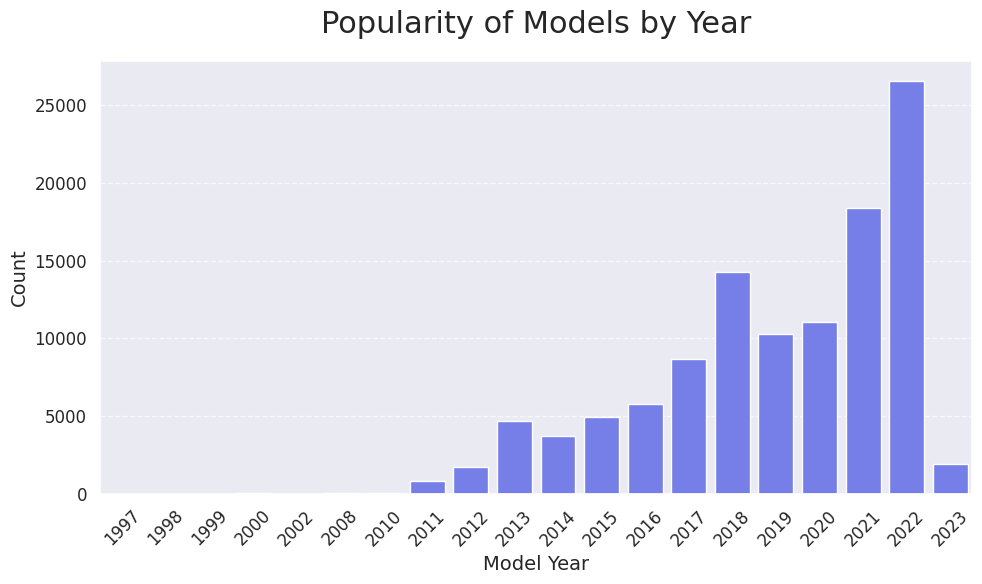

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Model Year', 
    y='count', 
    data=Ev_popularity, 
    color='#636EFA'  # Custom color for bars
)

# Customize the plot
plt.title("Popularity of Models by Year", fontsize=22, pad=20)
plt.xlabel("Model Year", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Show gridlines only on y-axis
plt.tight_layout()

# Show the plot
plt.show()

 Electric Vehicle (EV) sales have been steadily increasing over the years, reflecting a global shift toward sustainable and eco-friendly transportation.(EV) sales began gaining momentum around 2016, marking the start of a significant shift in the automotive industry.

# Top 10 Ev  Manufacturers

the above bar illustrates the top 10 manufactures of ev vehicles in us ,showcasing their dominance in markert.Tesla leads the significant margin with an impressive 52,078 vehicles

/tmp/ipykernel_3541/3645473572.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




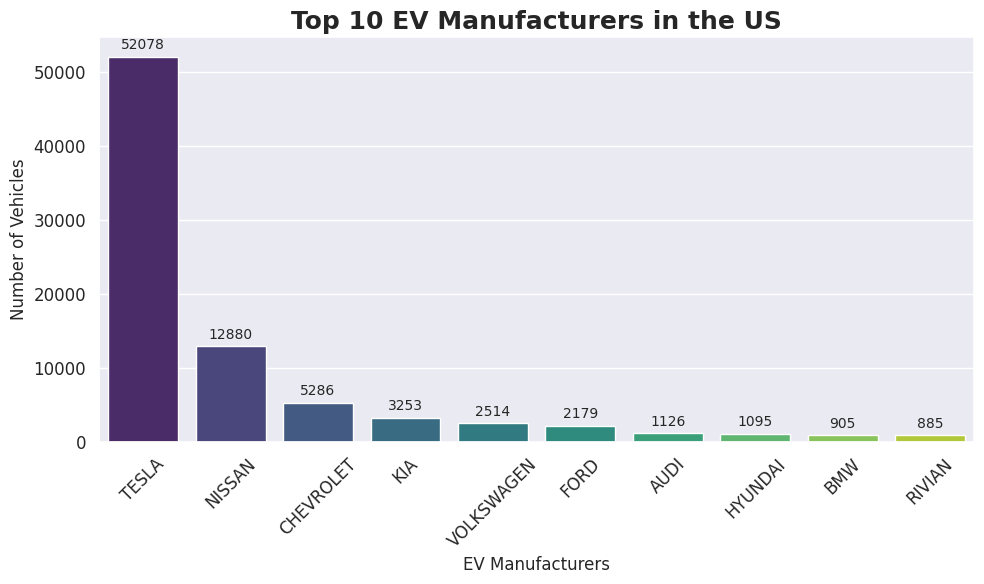

In [30]:
Data_bev = Ev_Data[Ev_Data['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']

Top_companies = Data_bev['Make'].value_counts(ascending=False).head(10).reset_index()
Top_companies.columns = ['Make', 'Count']  


sns.set_style("darkgrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=Top_companies,
    x='Make',
    y='Count',
    palette='viridis'
)


bar_plot.set_title('Top 10 EV Manufacturers in the US', fontsize=18, weight='bold', loc='center')
bar_plot.set_xlabel('EV Manufacturers', fontsize=12)
bar_plot.set_ylabel('Number of Vehicles', fontsize=12)
bar_plot.tick_params(axis='x', rotation=45)


for i, bar in enumerate(bar_plot.patches):
    bar_plot.annotate(
        format(bar.get_height(), '.0f'),
        (bar.get_x() + bar.get_width() / 2., bar.get_height()),
        ha='center', va='center',
        size=10, xytext=(0, 8),
        textcoords='offset points'
    )

# Show the plot
plt.tight_layout()
plt.show()


# Top 10 Electric Models with the Best Driving Range

In [28]:
import plotly.express as px

Ev_bev = Ev_Data[Ev_Data['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']
Ev_bev['Electric Range'] = pd.to_numeric(Ev_bev['Electric Range'], errors='coerce')
# Get the top 10 most frequent ranges
top_range = Ev_bev['Electric Range'].value_counts(ascending=False).head(10).index
# Filter for models with the top ranges
top_range_models = Ev_bev[Ev_bev['Electric Range'].isin(top_range)]
# Prepare the result DataFrame
result = (
    top_range_models[['Make', 'Model', 'Electric Range']]
    .drop_duplicates()
    .sort_values(by='Electric Range', ascending=False)
)
# Plot the bar chart
fig = px.bar(
    data_frame=result,
    x='Model',
    y='Electric Range',
    title='Top Models by Electric Range',
    labels={'Model': 'Car Model', 'Electric Range': 'Range (Miles)'},
    template='plotly_dark',
    color_discrete_sequence=['#636EFA'],  # Set a custom color
    height=600
)

# Customize the layout
fig.update_layout(
    xaxis_title="Car Model",
    yaxis_title="Electric Range (Miles)",
    xaxis=dict(tickangle=45),
    plot_bgcolor='rgba(0, 0, 0, 0)'
)

fig.show()


/tmp/ipykernel_3541/962268109.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Most Ev car sold city 

In [ ]:
Ev_bev = Ev_Data[Ev_Data['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']
Ev_city_cnd = Ev_Data['City'].value_counts().reset_index()


In [41]:
Ev_city_cnd

,City,count
0,Seattle,20305
1,Bellevue,5921
2,Redmond,4201
3,Vancouver,4013
4,Kirkland,3598
...,...,...
624,North Conway,1
625,Summerville,1
626,Lansing,1
627,Williston,1
